In [2]:
import sys
sys.path.append('/home/painchess/projects_clean/Simulations')
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
from simulation import *
import illustris_python.groupcat as groupcat
import illustris_python.sublink as sublink
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import ticker

# Make the mah 

In [2]:
def make_illustris_mah(basepath, nhalos):
    lhtpath = basepath + '/../postprocessing/trees/LHaloTree'
    file1 = h5py.File(lhtpath+'/trees_sf1_099.0.hdf5', 'r')
    head = file1['Header']
    GroupFirstSub = groupcat.loadHalos(basepath,99,fields=['GroupFirstSub'])
    mah = []
    for i in range(nhalos):
        mah.append(sublink.loadTree(basepath, 99, GroupFirstSub[i], fields=['SubhaloMass'], onlyMPB=True)*1e10)
    return np.array(mah, dtype=object)

# Get the MAH 

In [3]:
path = '/home/painchess/YubaHDD6T/oldsims/'
sim1 = Simulation('Illustris', 0.31, 0.82, path)
rd = sim1.get_redshifts()
mah = sim1.get_mah()

Text(0.5, 1.0, 'Illustris mah test')

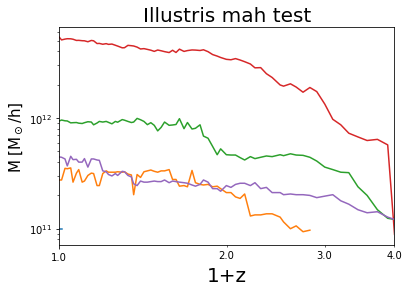

In [14]:
for i in range(5):
    n = np.random.randint(len(mah))
    mh = mah[n]
    plt.loglog(1+rd[:len(mh)], mh)
ax = plt.gca()
ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim(1,4)
plt.xlabel('1+z', size=20)
plt.ylabel(r'M [M$_\odot$/h]', size=15)
plt.title('Illustris mah test', size=20)